<a href="https://colab.research.google.com/github/keduog/llama3/blob/main/spirograph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

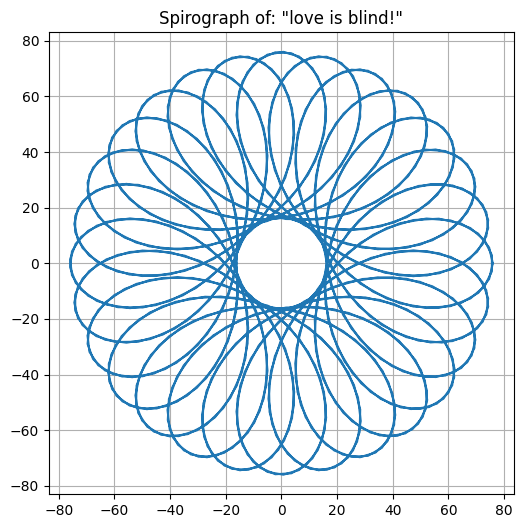

In [8]:
# Install dependencies (only if running in Colab or new environment)
# !pip install sentence-transformers scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Load the Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirograph_from_sentence(sentence):
    # Step 1: Embed the target sentence and add a dummy sentence for PCA
    sentences = [sentence, "This is a placeholder sentence."]
    embeddings = model.encode(sentences)

    # Step 2: Reduce dimensionality using PCA on both sentences
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)[0]  # Only use the first (real) sentence

    # Step 3: Define spirograph parameters
    R = 50 + int(reduced[0] * 10)
    r = 10 + int(abs(reduced[1]) * 10)
    d = 30

    # Step 4: Generate spirograph pattern
    t = np.linspace(0, 2 * np.pi * 10, 1000)
    x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
    y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)

    return x, y

# Example sentence
sentence = "love is blind!"
x, y = generate_spirograph_from_sentence(sentence)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(x, y, linewidth=1.5)
plt.title(f"Spirograph of: \"{sentence}\"", fontsize=12)
plt.axis('equal')
plt.grid(True)
plt.show()


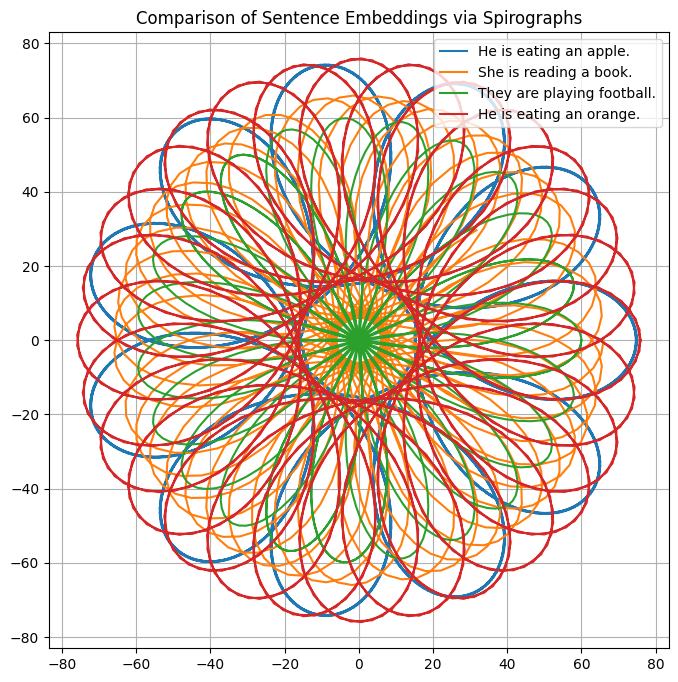

In [9]:
# Install if needed
# !pip install sentence-transformers scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirographs(sentences):
    # Add dummy sentence to meet PCA requirement
    sentences_with_placeholder = sentences + ["This is a placeholder sentence."]
    embeddings = model.encode(sentences_with_placeholder)

    # PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Exclude placeholder
    reduced_embeddings = reduced_embeddings[:-1]

    spirographs = []
    for reduced in reduced_embeddings:
        R = 50 + int(reduced[0] * 10)
        r = 10 + int(abs(reduced[1]) * 10)
        d = 30
        t = np.linspace(0, 2 * np.pi * 10, 1000)
        x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
        y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)
        spirographs.append((x, y))
    return spirographs

# Sentences to compare
sentences = [
    "He is eating an apple.",
    "She is reading a book.",
    "They are playing football.",
    "He is eating an orange."
]

# Generate and plot
spirographs = generate_spirographs(sentences)

plt.figure(figsize=(8, 8))
for (x, y), label in zip(spirographs, sentences):
    plt.plot(x, y, label=label)

plt.title("Comparison of Sentence Embeddings via Spirographs")
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


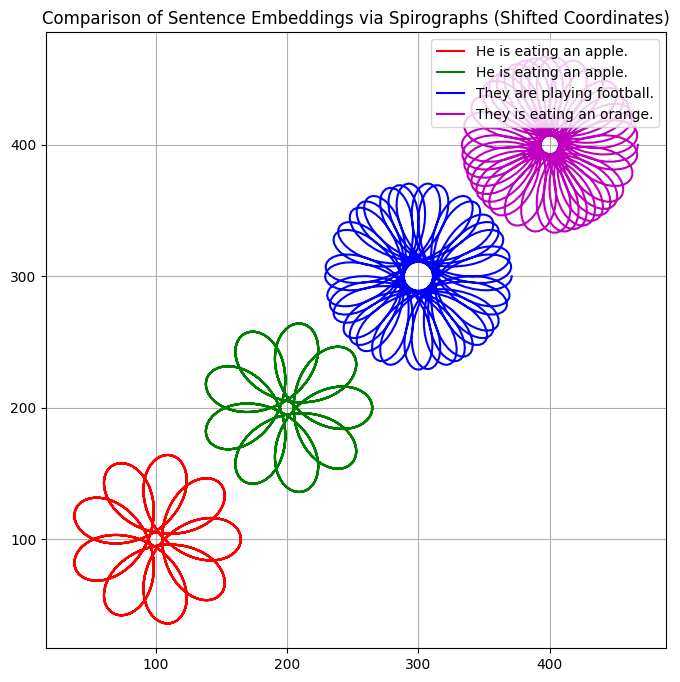

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirographs(sentences):
    # Add dummy sentence to meet PCA requirement
    sentences_with_placeholder = sentences + ["This is a placeholder sentence."]
    embeddings = model.encode(sentences_with_placeholder)

    # PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Exclude placeholder
    reduced_embeddings = reduced_embeddings[:-1]

    spirographs = []
    for reduced in reduced_embeddings:
        R = 50 + int(reduced[0] * 10)
        r = 10 + int(abs(reduced[1]) * 10)
        d = 30
        t = np.linspace(0, 2 * np.pi * 10, 1000)
        x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
        y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)
        spirographs.append((x, y))
    return spirographs

# Sentences to compare
sentences = [
    "He is eating an apple.",
    "He is eating an apple.",
   # "She is reading a book.",
    "They are playing football.",
    "They is eating an orange."
]

# Generate spirographs
spirographs = generate_spirographs(sentences)

# Plotting with different coordinate systems and color codes
plt.figure(figsize=(8, 8))

# Define different offsets for each spirograph
offsets = [(100, 100), (200, 200), (300, 300), (400, 400)]  # Different coordinate shifts
colors = ['r', 'g', 'b', 'm']  # Red, Green, Blue, Magenta

# Plot each spirograph with an offset and color
for (x, y), label, (offset_x, offset_y), color in zip(spirographs, sentences, offsets, colors):
    plt.plot(x + offset_x, y + offset_y, label=label, color=color)

plt.title("Comparison of Sentence Embeddings via Spirographs (Shifted Coordinates)")
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


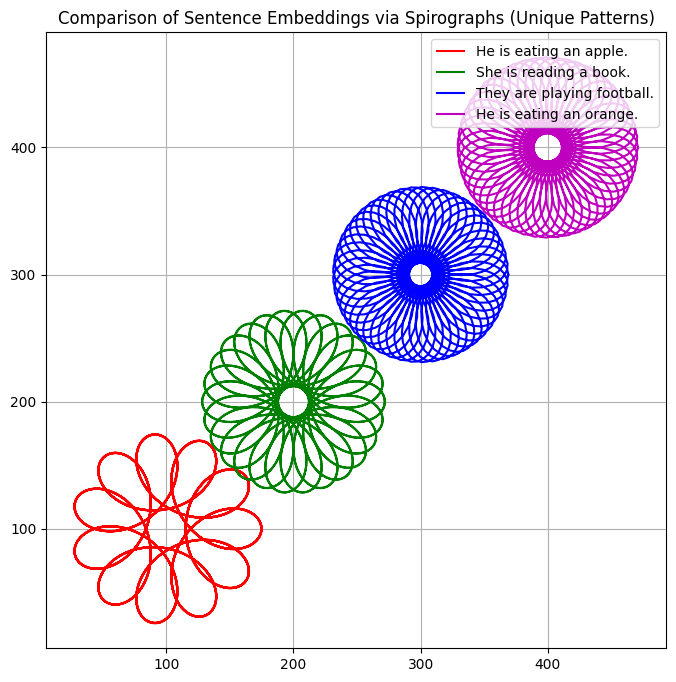

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirographs(sentences):
    embeddings = model.encode(sentences)

    # Scaling factor to add more variation based on the embedding's values
    spirographs = []
    for embedding in embeddings:
        # Use more unique components of the embedding
        R = 50 + int(embedding[0] * 50)  # Scale the first component
        r = 10 + int(abs(embedding[1]) * 10)  # Scale the second component
        d = 30 + int(abs(embedding[2]) * 10)  # Scale the third component for more variation
        t = np.linspace(0, 2 * np.pi * 10, 1000)

        # Generate unique spirograph pattern
        x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
        y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)

        spirographs.append((x, y))
    return spirographs

# Sentences to compare
sentences = [
    "He is eating an apple.",
    "She is reading a book.",
    "They are playing football.",
    "He is eating an orange."
]

# Generate spirographs
spirographs = generate_spirographs(sentences)

# Plotting with different coordinate systems and color codes
plt.figure(figsize=(8, 8))

# Define different offsets for each spirograph
offsets = [(100, 100), (200, 200), (300, 300), (400, 400)]  # Different coordinate shifts
colors = ['r', 'g', 'b', 'm']  # Red, Green, Blue, Magenta

# Plot each spirograph with an offset and color
for (x, y), label, (offset_x, offset_y), color in zip(spirographs, sentences, offsets, colors):
    plt.plot(x + offset_x, y + offset_y, label=label, color=color)

plt.title("Comparison of Sentence Embeddings via Spirographs (Unique Patterns)")
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')

# Save the plot as an image
plt.savefig('improved_spirograph_comparison.png')
plt.show()



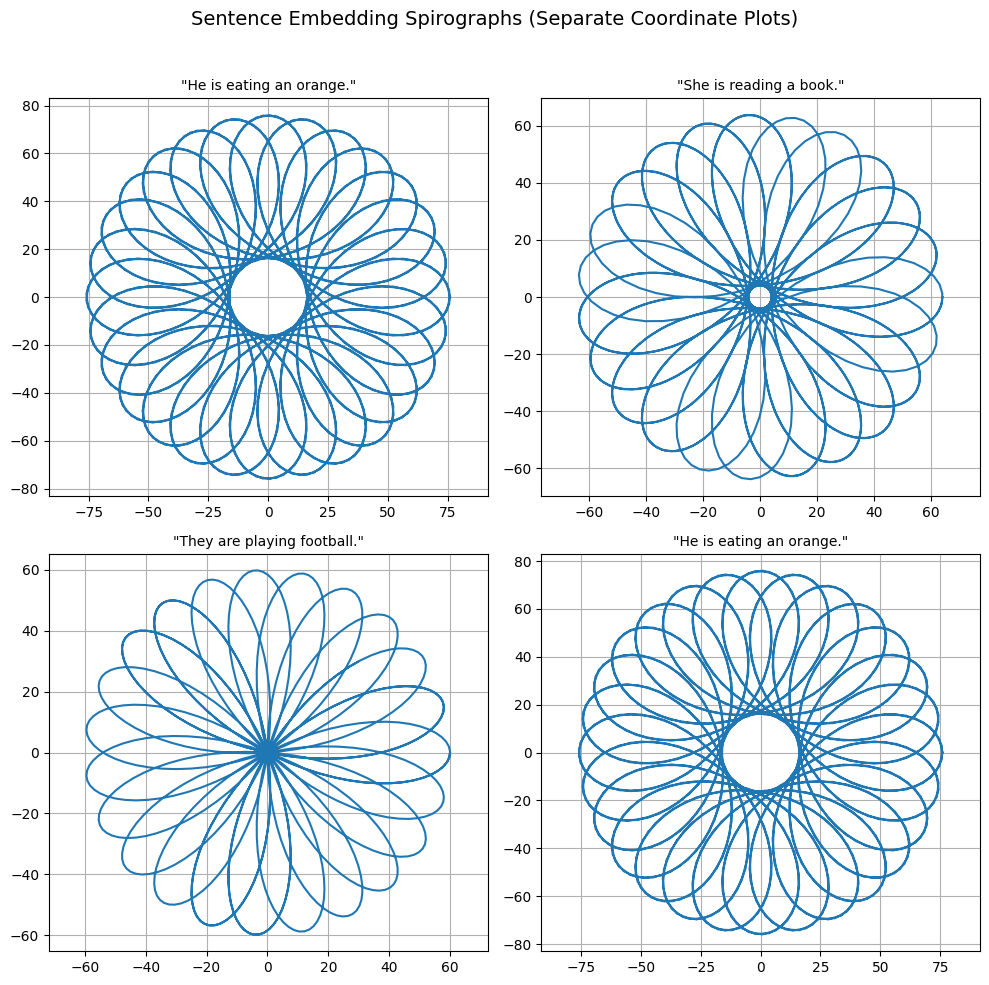

In [11]:
# Install required packages if using in a new environment
# !pip install sentence-transformers scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Load the pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirographs(sentences):
    # Add a dummy sentence for PCA requirements
    sentences_with_placeholder = sentences + ["This is a placeholder sentence."]
    embeddings = model.encode(sentences_with_placeholder)

    # Reduce embeddings to 2D using PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Remove dummy sentence's reduced embedding
    reduced_embeddings = reduced_embeddings[:-1]

    spirographs = []
    for reduced in reduced_embeddings:
        R = 50 + int(reduced[0] * 10)
        r = 10 + int(abs(reduced[1]) * 10)
        d = 30
        t = np.linspace(0, 2 * np.pi * 10, 1000)
        x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
        y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)
        spirographs.append((x, y))
    return spirographs

# Sentences to compare
sentences = [
    "He is eating an orange.",
    "She is reading a book.",
    "They are playing football.",
    "He is eating an orange."
]

# Generate spirograph coordinates for each sentence
spirographs = generate_spirographs(sentences)

# Plotting: each sentence gets its own subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid
axs = axs.flatten()

for ax, (x, y), label in zip(axs, spirographs, sentences):
    ax.plot(x, y)
    ax.set_title(f'"{label}"', fontsize=10)
    ax.axis('equal')
    ax.grid(True)

plt.suptitle("Sentence Embedding Spirographs (Separate Coordinate Plots)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


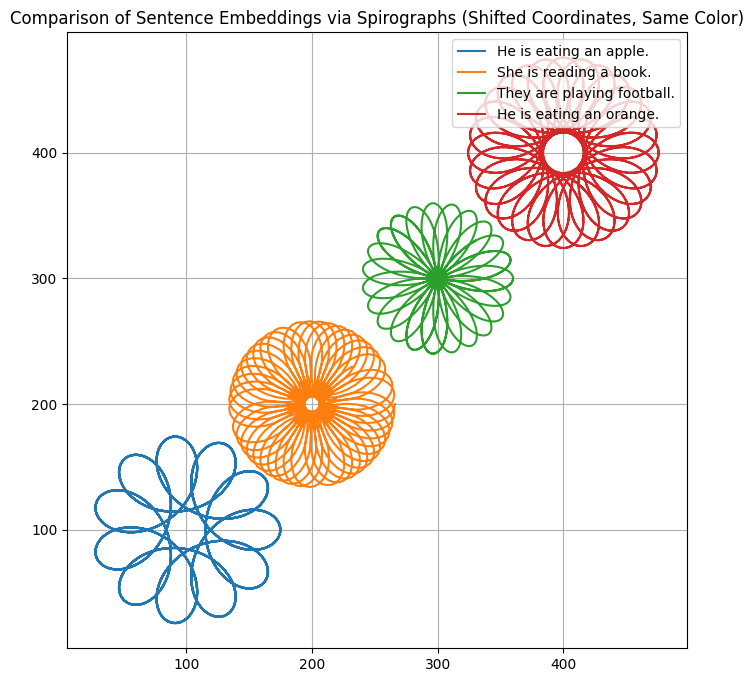

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirographs(sentences):
    # Add dummy sentence to meet PCA requirement
    sentences_with_placeholder = sentences + ["This is a placeholder sentence."]
    embeddings = model.encode(sentences_with_placeholder)

    # PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Exclude placeholder
    reduced_embeddings = reduced_embeddings[:-1]

    spirographs = []
    for reduced in reduced_embeddings:
        R = 50 + int(reduced[0] * 10)
        r = 10 + int(abs(reduced[1]) * 10)
        d = 30
        t = np.linspace(0, 2 * np.pi * 10, 1000)
        x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
        y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)
        spirographs.append((x, y))
    return spirographs

# Sentences to compare
sentences = [
    "He is eating an apple.",
    "She is reading a book.",
    "They are playing football.",
    "He is eating an orange."
]

# Generate spirographs
spirographs = generate_spirographs(sentences)

# Plotting with different coordinate systems but same color
plt.figure(figsize=(8, 8))

# Define different offsets for each spirograph
offsets = [(100, 100), (200, 200), (300, 300), (400, 400)]  # Different coordinate shifts

# Plot each spirograph with an offset, using the same color
for (x, y), label, (offset_x, offset_y) in zip(spirographs, sentences, offsets):
    plt.plot(x + offset_x, y + offset_y, label=label)

plt.title("Comparison of Sentence Embeddings via Spirographs (Shifted Coordinates, Same Color)")
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


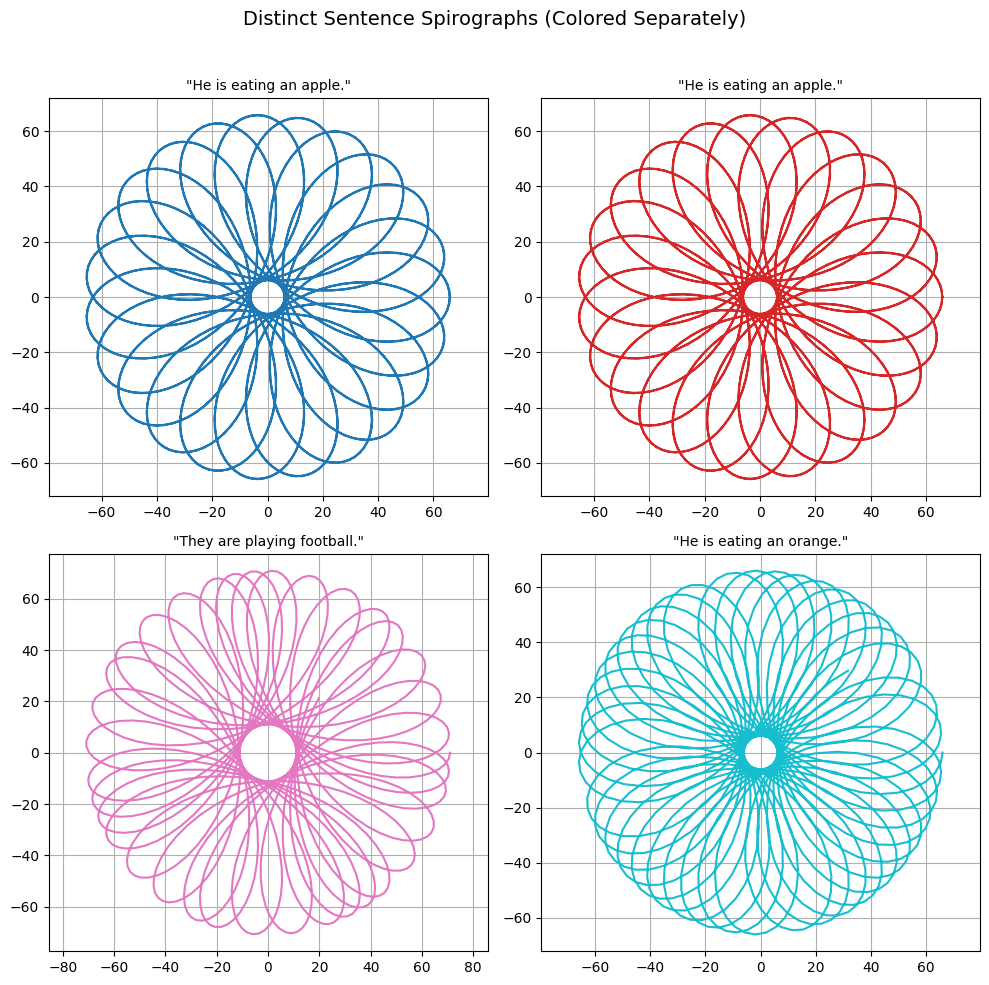

In [17]:
# Install required packages if running in Colab or a new environment
# !pip install sentence-transformers scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirographs(sentences):
    # Add a dummy sentence for PCA
    sentences_with_placeholder = sentences + ["This is a placeholder sentence."]
    embeddings = model.encode(sentences_with_placeholder)

    # Apply PCA
    pca = PCA(n_components=5)
    reduced_embeddings = pca.fit_transform(embeddings)
    reduced_embeddings = reduced_embeddings[:-1]  # remove dummy

    spirographs = []
    for reduced in reduced_embeddings:
        R = 50 + int(reduced[0] * 10)
        r = 10 + int(abs(reduced[1]) * 10)
        d = 30
        t = np.linspace(0, 2 * np.pi * 10, 1000)
        x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
        y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)
        spirographs.append((x, y))
    return spirographs

# Sentences to visualize
sentences = [
    "He is eating an apple.",
   # "He is eating an orange.",
   # "She is reading a book.",
    "He is eating an apple.",
    "They are playing football.",
    "He is eating an orange."
]

# Generate spirograph coordinates
spirographs = generate_spirographs(sentences)

# Use a distinct color for each sentence from a colormap
colors = cm.tab10(np.linspace(0, 1, len(sentences)))

# Create separate plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for ax, (x, y), label, color in zip(axs, spirographs, sentences, colors):
    ax.plot(x, y, color=color, linewidth=1.5)
    ax.set_title(f'"{label}"', fontsize=10)
    ax.axis('equal')
    ax.grid(True)

plt.suptitle("Distinct Sentence Spirographs (Colored Separately)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


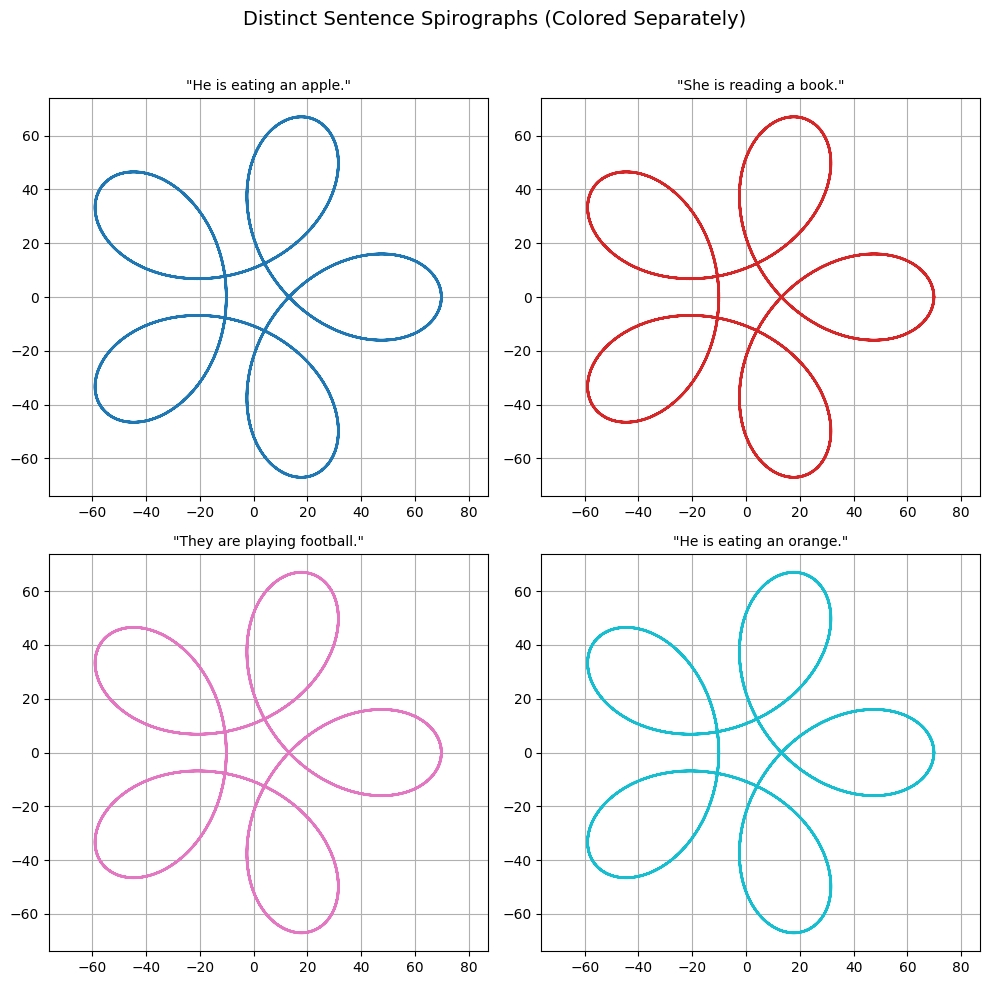

In [18]:
# Install required packages if running in Colab or a new environment
# !pip install sentence-transformers scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import matplotlib.cm as cm

# Load the pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirographs(sentences):
    # Get embeddings for each sentence
    embeddings = model.encode(sentences)

    spirographs = []

    for embedding in embeddings:
        # Use custom slicing of the 384-dimensional vector for R, r, d
        R = 50 + int(np.mean(embedding[:128]) * 20)   # First third for outer radius
        r = 10 + int(np.mean(embedding[128:256]) * 10)  # Second third for inner radius
        d = 30 + int(np.mean(embedding[256:]) * 10)   # Last third for pen distance

        # Create spirograph pattern using the parameters
        t = np.linspace(0, 2 * np.pi * 10, 1000)
        x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
        y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)

        spirographs.append((x, y))

    return spirographs

# Sentences to compare
sentences = [
    "He is eating an apple.",
    "She is reading a book.",
    "They are playing football.",
    "He is eating an orange."
]

# Generate spirograph coordinates for each sentence
spirographs = generate_spirographs(sentences)

# Use a distinct color for each sentence from a colormap
colors = cm.tab10(np.linspace(0, 1, len(sentences)))

# Create separate plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for ax, (x, y), label, color in zip(axs, spirographs, sentences, colors):
    ax.plot(x, y, color=color, linewidth=1.5)
    ax.set_title(f'"{label}"', fontsize=10)
    ax.axis('equal')
    ax.grid(True)

plt.suptitle("Distinct Sentence Spirographs (Colored Separately)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


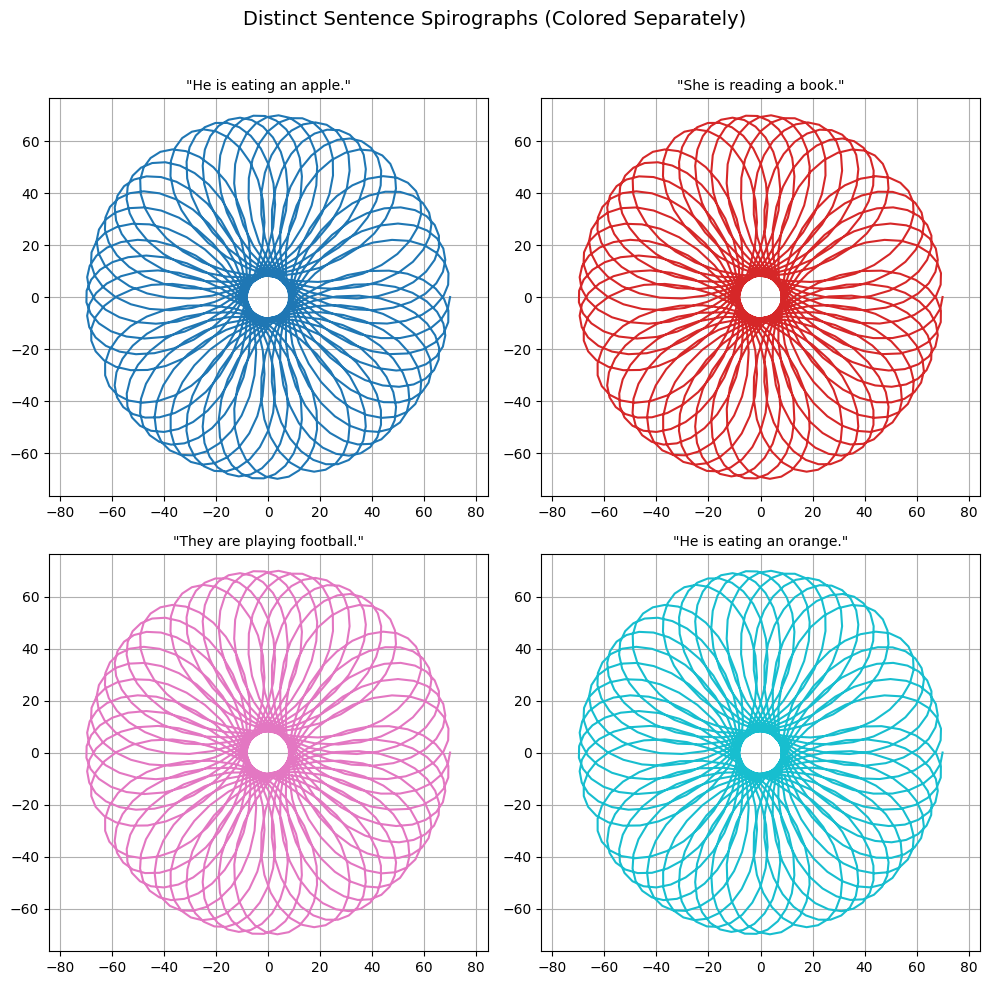

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import matplotlib.cm as cm

# Load the pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirographs(sentences):
    # Get embeddings for each sentence
    embeddings = model.encode(sentences)

    spirographs = []

    for embedding in embeddings:
        # Use custom slicing of the 384-dimensional vector for R, r, d
        R = 50 + int(np.mean(embedding[:128]) * 30)   # First third for outer radius
        r = 10 + int(np.std(embedding[128:256]) * 20)  # Second third for inner radius (std dev for variability)
        d = 30 + int(np.max(embedding[256:]) * 10)   # Last third for pen distance (range for diversity)

        # Create spirograph pattern using the parameters
        t = np.linspace(0, 2 * np.pi * 10, 1000)
        x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
        y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)

        spirographs.append((x, y))

    return spirographs

# Sentences to compare
sentences = [
    "He is eating an apple.",
    "She is reading a book.",
    "They are playing football.",
    "He is eating an orange."
]

# Generate spirograph coordinates for each sentence
spirographs = generate_spirographs(sentences)

# Use a distinct color for each sentence from a colormap
colors = cm.tab10(np.linspace(0, 1, len(sentences)))

# Create separate plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for ax, (x, y), label, color in zip(axs, spirographs, sentences, colors):
    ax.plot(x, y, color=color, linewidth=1.5)
    ax.set_title(f'"{label}"', fontsize=10)
    ax.axis('equal')
    ax.grid(True)

plt.suptitle("Distinct Sentence Spirographs (Colored Separately)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


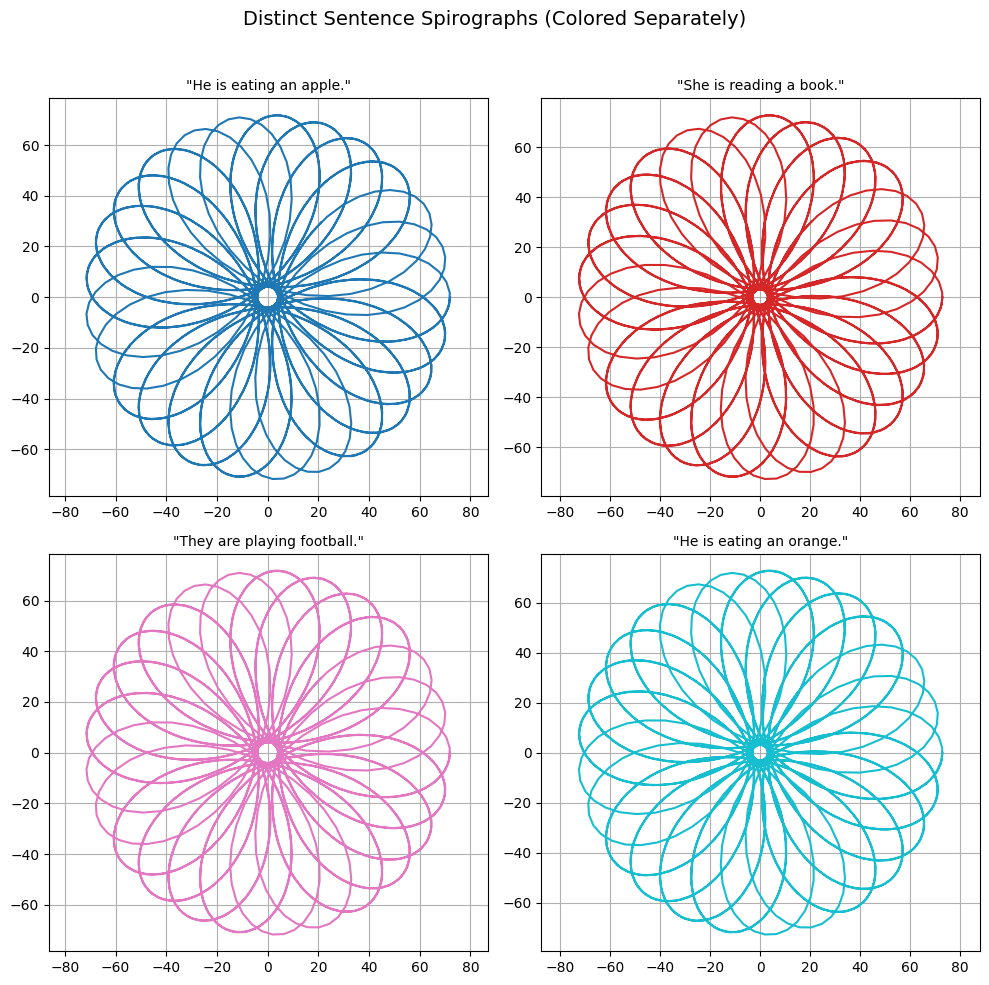

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import matplotlib.cm as cm

# Load the pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_spirographs(sentences):
    # Get embeddings for each sentence
    embeddings = model.encode(sentences)

    spirographs = []

    for embedding in embeddings:
        # Use custom slicing of the 384-dimensional vector for R, r, d
        # Apply stronger scaling and combine statistics for variability
        R = 50 + int(np.mean(embedding[:128]) * 100)   # First third for outer radius (stronger scaling)
        r = 10 + int(np.std(embedding[128:256]) * 50)  # Second third for inner radius (std dev scaling)
        d = 30 + int(np.max(embedding[256:]) * 40)     # Last third for pen distance (max scaling)

        # Create spirograph pattern using the parameters
        t = np.linspace(0, 2 * np.pi * 10, 1000)
        x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
        y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)

        spirographs.append((x, y))

    return spirographs

# Sentences to compare
sentences = [
    "He is eating an apple.",
    "She is reading a book.",
    "They are playing football.",
    "He is eating an orange."
]

# Generate spirograph coordinates for each sentence
spirographs = generate_spirographs(sentences)

# Use a distinct color for each sentence from a colormap
colors = cm.tab10(np.linspace(0, 1, len(sentences)))

# Create separate plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for ax, (x, y), label, color in zip(axs, spirographs, sentences, colors):
    ax.plot(x, y, color=color, linewidth=1.5)
    ax.set_title(f'"{label}"', fontsize=10)
    ax.axis('equal')
    ax.grid(True)

plt.suptitle("Distinct Sentence Spirographs (Colored Separately)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
